# Active contours segmentation for Brain images

Active contours by fitting snakes to features of images. Supports single and multichannel 2D images. Snakes can be periodic (for segmentation) or have fixed and/or free ends. The output snake has the same length as the input boundary. As the number of points is constant, make sure that the initial snake has enough points to capture the details of the final contour.

In this example, we try to segment a 2d input images for time saving purposes.

In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib as mpl    
import matplotlib.ticker as ticker
import numpy as np
import math
from scipy.stats import norm
# for display
sub_size = 16
sup_size=20
if_plot = False

Load the input Image

In [2]:
dataFile = '../Data/brain.nii.gz'
maskFile = '../Data/brain_mask.nii'# Mask file, if any
brainImage = nib.load(dataFile).get_fdata()
maskImage = nib.load(maskFile).get_fdata()

slices = brainImage.shape[0]//2
img_slice = brainImage[slices]
seg_slice = maskImage[slices]

Visualize the data in axial, coronal and sagittal view.
Feel free to change the value of the array slices to see the different slices in axial, coronal and sagittal view.

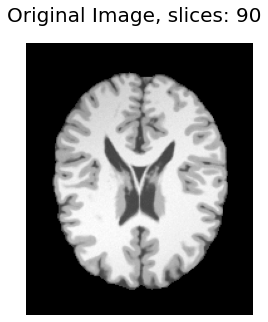

In [3]:
def plotOriginalImage(image, slices, title):
    fig = plt.figure(figsize=(5,5))
    fig.suptitle(title+', slices: ' + str(slices), fontsize=sup_size)
    plt.imshow(image, cmap='gray'); plt.axis('off')
    plt.show()

plotOriginalImage(img_slice, slices, title='Original Image')

Now, let's us initialize the snakes model

In [29]:
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

s = np.linspace(0, 2*np.pi, 400)
r = 110 + 90*np.sin(s)
c = 90 + 90*np.cos(s)
init = np.array([r, c]).T

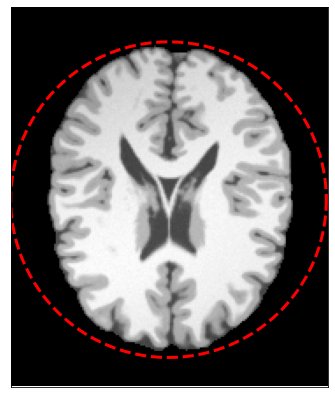

In [30]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img_slice, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img_slice.shape[1], img_slice.shape[0], 0])
plt.show()

Segment the brain imges using the snake model.

In [31]:
snake = active_contour(gaussian(img_slice, 3, preserve_range=False), init, alpha=0.015, beta=10, gamma=0.001)

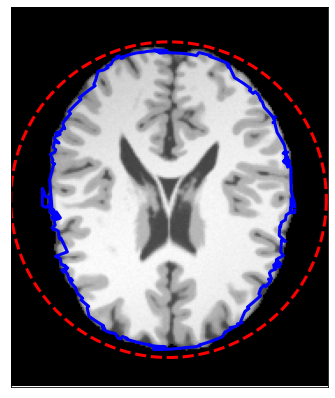

In [32]:
# Plot results
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img_slice, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img_slice.shape[1], img_slice.shape[0], 0])

plt.show()